In [30]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
from sklearn.cluster import KMeans
import random
from scipy.spatial import distance_matrix

In [31]:
dataset = pd.read_csv('Bangalore.csv',usecols=['Price','Area','Location','No. of Bedrooms','CarParking'])

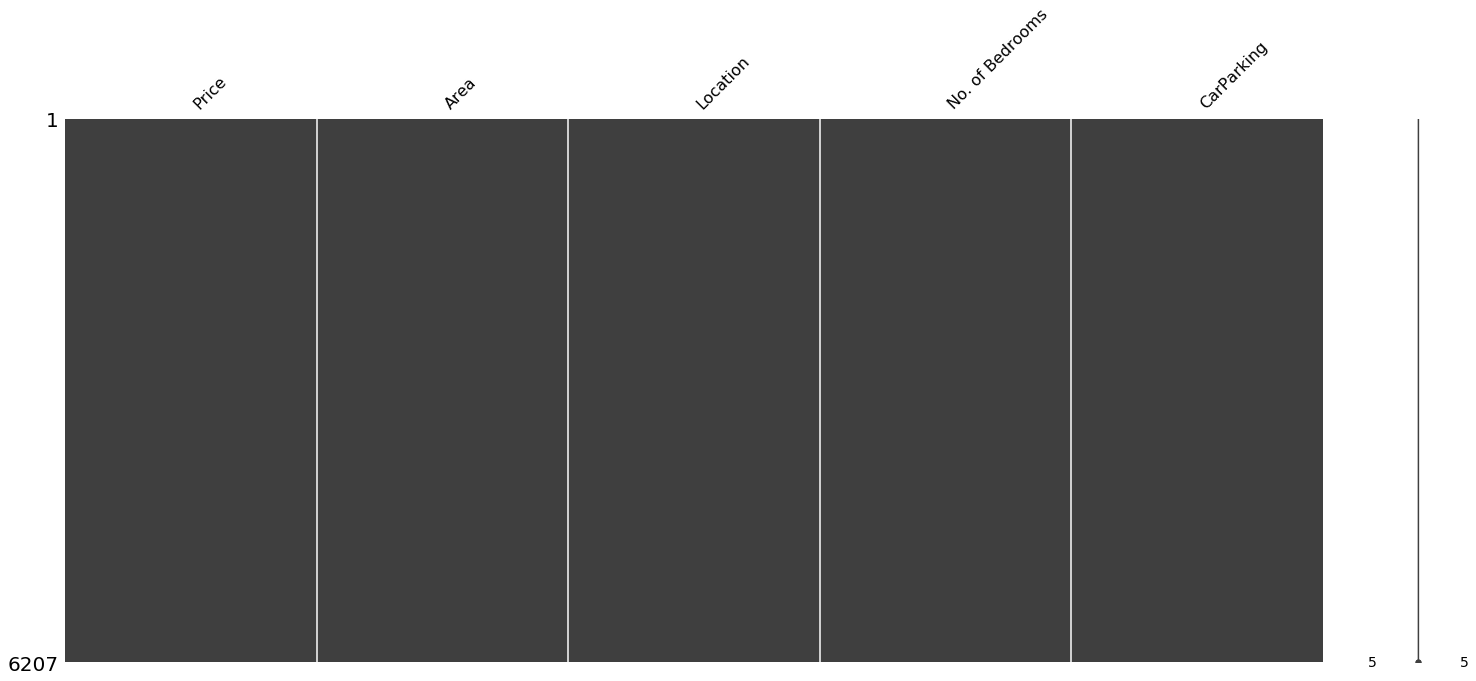

In [32]:
import missingno
missingno.matrix(dataset)

In [33]:
dataset['CarParking'].value_counts()

9    4256
1    1133
0     818
Name: CarParking, dtype: int64

In [34]:
dataset['CarParking'] = dataset['CarParking'].apply(lambda x:random.choice([1,0]) if x==9 else x)

In [35]:
location_stats = dataset.groupby('Location')['Location'].agg('count').sort_values(ascending = False)
location_stats_less_than_50 = location_stats[location_stats<=50]
dataset['Location'] = dataset['Location'].apply(lambda x:'other' if x in location_stats_less_than_50 else x)
dummies = pd.get_dummies(dataset['Location'])
dataset = pd.concat([dataset,dummies.drop('other',axis='columns')],axis=1)
dataset.head()

,Price,Area,Location,No. of Bedrooms,CarParking,Anekal City,Attibele,Avalahalli Off Sarjapur Road,Banashankari,Begur,...,Sarjapur,Sarjapur Road Wipro To Railway Crossing,Talaghattapura,Uttarahalli,Uttarahalli Main Road,Varthur,Whitefield Hope Farm Junction,Yelahanka,Yeshwantpur,sarjapura attibele road
0,30000000,3340,other,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7888000,1045,other,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8358000,1675,other,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6845000,1670,other,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
dataset.drop(['Location'],inplace=True, axis=1)

In [37]:
dataset['Price1']=dataset['Price']
dataset.drop(["Price"],inplace=True,axis=1)

In [38]:
from sklearn.model_selection import train_test_split
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

In [39]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [40]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
y_pred=reg.predict(X_test)

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.19468298574883303